<a href="https://colab.research.google.com/github/drfeinberg/Scientific-Computing/blob/master/Lectures/Automatic_Face_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Automatic and manual landmarks for face perception research
Cartesian coordinate landmarks are an essential component of face perception research. These landmarks delinate the shape of faces, and allow for a range of operations on this important social stimulus, such as averaging, warping, anatomical measurements, or complex analysis like principal components analysis. 

However, landmarks are expensive to generate, taking many human-hours of work to produce. Given that interest in face research has led to a collection of many large databases, from which many insights stand to be unearthed, researchers face the daunting task of manually delineating these appearances. Worse still, once delineation has begun, for the sake of consistency and to minimise error, it is recommended a single person complete the whole set and it be double checked by another.

The advent of modern deep learning frameworks have resulted in neural networks that can recognise faces with close to perfect accuracy. An initial stumbling block in this area was the rapid and automatic detection of facial landmarks that could be used for analysis. Despite having being solved close to 20 years ago, face perception researchers have either shown mistrust over these landmarks in favour of manual delineation, or are unaware that computers are now capable of accurately and reproducibly delineating faces.


These measures are of:
- Symmetry, from both vector measures (e.g. Holzleitner et al, 2019; Jones & Jaeger, 2019) 
- Distinctiveness or averageness, from vector measures (e.g. Holzleitner et al, 2019; Jones & Jaeger, 2019)
- Sexual dimorphism (e.g. Holzleitner et al, 2019; Jones & Jaeger, 2019) using the multivariate regression approach of Mitteroecker et al (2015).
- Facial width-to-height ratio (Lefevre et al., 2015).

### First, make sure you chage runtime type to gpu in the Runtime menu

## Install missing modules

In [1]:
!pip install CMake
!pip install face_recognition
!pip install pingouin
!pip install pythonfaceregressor

     |████████████████████████████████| 100.2MB 44kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=c85c5691de9d1003edbf4ad84cdb89d2fb0954ccdf324852c57e309d924d74d9
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models
     |████████████████████████████████| 225kB 6.3MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.3-cp36-none-any.whl size=215457 sha256=e37e78f84f54bac82252d5ac2186e4a8ed48d93e4d31fb8a8ca67648dc4a8b67
  Stored in directory: /root/.cache/pip/wheels/bd/c9/67/c6862bf7e72786f3d578d59b4096c9a6003bd01c9fe0c16aa1
  Created wheel for outdated: filename=outdated-0.2.0-cp36-none-any.whl size=4962 sha256=f7237a42ee90b291ce48e93c2dc2a89c994a4c5d4c6b04c30bef32e76df48fab
  Stored in directory: /root/.cache/pip/wheels/fd/7c/ef/814f514d31197310872b5abf353feb8fef9d67ee658e1e7e39
  Created wheel for lit

## Automatically demarkate faces

#### Import Relevant Modules

In [0]:
import glob
import os
import face_recognition as fr

#### Create Function to write template files

In [0]:
def lms2tem(filename, points_list):
    
    # Open file 
    with open(filename + '.tem', 'w') as tem_file:
        
        # First work out the number of points and write it
        n_pts = len(points_list)
        tem_file.write('%s\n' % n_pts)
        
        # Iterate over the points list of tuples and write it
        for points in points_list:
            
            # Unpack the tuple of points
            x, y = points
            
            # Write each pair of points to the file
            tem_file.write(f'{x} {y}\n')
            
        # Write the extra line specifying 'zero lines' for Psychomorph
        tem_file.write('0\n ')
        
    return None

#### Create dictionary to store demarkation points

In [0]:
lm_dict = {}

#### Make sure google drive is mounted

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [10]:
for face in glob.glob('/content/drive/My Drive/Colab Notebooks/Scientific Computing/Lectures/Automatic Faces/*.jpg'):
    
    # Parse name and extension
    fname, ext = os.path.splitext(face)
    
    # Generate the landmarks with face_rec #
    # Read in the face
    face_im = fr.load_image_file(face)
    
    # Detect the landmarks, extract just the first face (there is only one in the image!)
    lms = fr.face_landmarks(face_im)[0]
    
    # Parse the dictionary into a single array
    auto_lms = [pt for feature in lms.values() for pt in feature]
    
    # Save the template
    lms2tem(fname, auto_lms)
    
    # Convert to a str vector and store in a dictionary
    lm_dict[face] = [str(pt) for xy in auto_lms for pt in xy]
    
    print('Finished face {}!'.format(fname))

Finished face /content/drive/My Drive/Colab Notebooks/Scientific Computing/Lectures/Automatic Faces/01-01-01-01-01-01-03!
Finished face /content/drive/My Drive/Colab Notebooks/Scientific Computing/Lectures/Automatic Faces/01-01-01-01-01-01-01!
Finished face /content/drive/My Drive/Colab Notebooks/Scientific Computing/Lectures/Automatic Faces/01-01-01-01-01-01-02!
Finished face /content/drive/My Drive/Colab Notebooks/Scientific Computing/Lectures/Automatic Faces/01-01-01-01-01-01-04!
Finished face /content/drive/My Drive/Colab Notebooks/Scientific Computing/Lectures/Automatic Faces/01-01-01-01-01-01-07!
Finished face /content/drive/My Drive/Colab Notebooks/Scientific Computing/Lectures/Automatic Faces/01-01-01-01-01-01-08!
Finished face /content/drive/My Drive/Colab Notebooks/Scientific Computing/Lectures/Automatic Faces/01-01-01-01-01-01-09!
Finished face /content/drive/My Drive/Colab Notebooks/Scientific Computing/Lectures/Automatic Faces/01-01-01-01-01-01-10!
Finished face /content/d

In [0]:
# Open the file for writing.
with open('Landmark Representations Full Set.txt', 'w') as output:
    
    # Grab dimensions of landmarks
    dims = len(auto_lms)
    
    # First create column names
    cols = ['ID'] + [title for pt in range(0, dims) for title in ['pt{}_X'.format(pt), 'pt{}_Y'.format(pt)]]
    
    # Write to file
    output.write('\t'.join(cols) + '\n')
    
    # Write out vector representation
    for fid, vector in lm_dict.items():
        
        # Write filename
        output.write('{}\t'.format(fid))
        
        # Now write the vector
        output.write('\t'.join(vector) + '\n')
        

## Automatically analyze faces

### Import needed modules


In [12]:
import numpy as np
import pandas as pd
import pingouin as pg

import matplotlib.pyplot as plt
import pythonfaceregressor as pfr
import seaborn as sns

import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

from functools import reduce

np.random.seed(31)
pd.set_option('display.max.columns', 9999)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 1. Defining Measurements
Before analysing any face data, is it necessary to measure the faces. Below, a class is defined that measure distinctiveness, symmetry, dimorphism using vector methods, and fWHR using the classical approach of computing distances between landmarks. This class, `ComputeMeasures` takes an array of shapes (each face is a rows, with columns as x and y coordinates). They also need a vector describing whether the face is female or male, as this is needed in some calculations. The class will return a DataFrame of measures for each face when `.fit()` is called on it.

For more details on the vector methods, see the following open code and papers.
- Vector methods: [Holzleitner et al., (2019)](https://osf.io/vhc5k); [Jones & Jaeger (2019)](https://osf.io/uyzmj/)

In [0]:
# Vector measures
class ComputeMeasures():
    
    # Initialise
    def __init__(self, shape_array, data, fit_type=None):
        
        # Attach the rest of the data to the class
        self.shape_array = shape_array
        self.data = data
        self.fit_type = fit_type # Lets us know whether the landmarks are automatic or manual
        
        return None
    
    def averageness(self):
        
        # Pointer, easier typing
        data = self.data.copy()
        
        # Slice the data to get the female and male faces out
        females = data[data['face_sex'] == 1]
        males = data[data['face_sex'] == 0]
        
        # Get the shapes
        female_shapes = self.shape_array.loc[females.index, :]
        male_shapes = self.shape_array.loc[males.index, :]
        
        # Compute the averages
        female_average = female_shapes.mean(0)
        male_average = male_shapes.mean(0)
        
        # Compute the Euclidean distance of each face from its sex-fixed average
        fem_dist = female_shapes.apply(lambda x: np.linalg.norm(x - female_average), axis=1)
        male_dist = male_shapes.apply(lambda x: np.linalg.norm(x - male_average), axis=1)
        
        # Concat & name
        average = pd.concat((fem_dist, male_dist))
        average.name = 'distinctiveness'
        
        # Give back
        return average
    
    def symmetry(self):
        
        # This can be done over the whole set
        reflections = self.shape_array.copy()
        
        # Multiply X by minus one
        reflections.loc[:, reflections.columns.str.contains('X')] *= -1
        
        # Compute shape differences, name
        symmetry = (self.shape_array - reflections).apply(np.linalg.norm, axis=1)
        symmetry.name = 'symmetry'
        
        # Give back
        return symmetry
        
    def dimorphism(self):
        
        # Shape
        shapes = self.shape_array.copy()
        sex = self.data[['face_sex']]
        
        # Add constant
        sex.insert(0, 'const', 1)
        
        # Compute the least squares solution
        axis, _, _, _ = np.linalg.lstsq(sex, shapes, rcond=-1)
        
        # Extract dimorphism axis
        dimorphism = axis[1,:]
        
        # Project each face onto this using a short custom function
        def proj(a, b):
            
            # Compute dot prod 
            dot = np.dot(a, b)
            
            # Magnitude of b
            mag = np.linalg.norm(b)
            
            # Normalise
            projection = dot/mag
            
            return projection
        
        # Apply the projection & name
        sexdim = shapes.apply(lambda x: proj(x, dimorphism), axis=1)
        sexdim.name = 'dimorphism'
        
        # Return
        return sexdim
    
    def fwhr(self, face_vector):

        # Convert the vector back to 2D space
        face_shape = face_vector.values.reshape(-1, 2)

        if self.fit_type == 'Manual':

            # Top heights
            top_left_height, top_right_height = face_shape[73,:], face_shape[80,:]

            # Get lower height points, of the lips
            bottom_left_height, bottom_right_height = face_shape[89,:], face_shape[91,:]

            # Take mean of these upper and lower heights to make a line
            top_height = np.vstack((top_left_height, top_right_height)).mean(0)
            bottom_height = np.vstack((bottom_left_height, bottom_right_height)).mean(0)

            # Get width
            left_width, right_width = face_shape[160,:], face_shape[162,:]
            
        
        # Derive measures based on the landmark type
        elif self.fit_type == 'Auto':

            # Get upper height points using eyebrow, as per Schild et al
            # I am using 19 and 24, different from de Kok - these points are HIGHER not sure why he used the lower ones
            top_left_height, top_right_height = face_shape[19,:], face_shape[24,:]

            # Get lower height points, of the lips
            bottom_left_height, bottom_right_height = face_shape[50,:], face_shape[52,:]

            # Take mean of these upper and lower heights to make a line
            top_height = np.vstack((top_left_height, top_right_height)).mean(0)
            bottom_height = np.vstack((bottom_left_height, bottom_right_height)).mean(0)

            # Get width
            left_width, right_width = face_shape[0,:], face_shape[16,:]

        # Compute distances
        height = np.linalg.norm(top_height - bottom_height)
        width = np.linalg.norm(left_width - right_width)

        # Divide and return
        whr = width/height

        return whr
    
    def fit(self):
        
        # Apply all functions
        avg = self.averageness()
        sym = self.symmetry()
        dimo = self.dimorphism()
        fwhr_ = self.shape_array.apply(self.fwhr, axis=1)
        fwhr_.name = 'fwhr'
        
        # Merge
        combined = pd.concat((avg, sym, dimo, fwhr_), axis=1, sort=True)
        
        # Return
        return combined

### 2. Read in the data
Next, read in the file lists and prepare the data analysis. They will need to be formatted and copied; one for the manual and automatic landmark sets. This will require four dataframes. 

Important note - the folder structure for this analysis assumes the notebook is in a higher level folder with the following branches available to it:

```
+ London
-- Automatic Faces
-- Manual Faces
-- london_faces_info.csv
-- lonon_faces_ratings.csv
+ ThreeDSK
-- Automatic Faces
-- Manual Faces
-- Corrected Auto
-- threedsk_faces.txt
```

The manual and automatic faces contain the photographs and respective landmarks to be analysed, and the text or csv files contain the basic demographics of the faces. 

In [14]:
our_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Scientific Computing/Lectures/Automatic Faces/Landmark Representations_faces_info_EDIT.csv')
print(our_data.head())

# Recode sex in each dataframe to a dummy variable, 0 = male


# Set the index to the face_id column
our_data.set_index('face_id', inplace=True)
#three.set_index('face_id', inplace=True)

                face_id  face_sex
0  01-01-01-01-01-01-01         0
1  01-01-01-01-01-01-02         1
2  01-01-01-01-01-01-03         0
3  01-01-01-01-01-01-04         1
4  01-01-01-01-01-01-05         0


In [0]:
# Generate two copies of each dataframe that have the correct index location pointing to the images
def replace_index(frame, path):
    
    # Generate appender
    if 'Auto' in path:
        appender = ''
    elif 'Manual' in path:
        appender = '_manual'
        
    # Copy
    frame_ = frame.copy()
    
    # Set path
    frame_.index = [path + ind + appender for ind in frame_.index]
    #frame_.index = [path + ind for ind in frame_.index]
    return frame_

# Use the function
path = "/content/drive/My Drive/Colab Notebooks/Scientific Computing/Lectures/"
our_data = replace_index(our_data, '/content/drive/My Drive/Colab Notebooks/Scientific Computing/Lectures/Automatic Faces/')


### 3.Use the face regressor to read in, parse, and flatten the arrays
Reading in all the face landmarks can be a bit onerous. Thankfully the `pythonfaceregressor` module does that for us without any trouble, and we can access the data as a DataFrame. In the cells below we create some objects that will average the faces for us and retrieve the landmarks, for both image sets.

In [0]:
# Gather the data
our_data_auto_data = pfr.Modeller(our_data).gather_data()

### 4. Derive the measurements for the faces
Pass the faces to the new measurement class. Some data wrangling involved here.

In [0]:
# First, ask the face regressor objects to give back the data in the correct format for analysis
our_data_auto_shapes, _, our_data_auto_predictors = our_data_auto_data.return_arrays(as_frame=True)


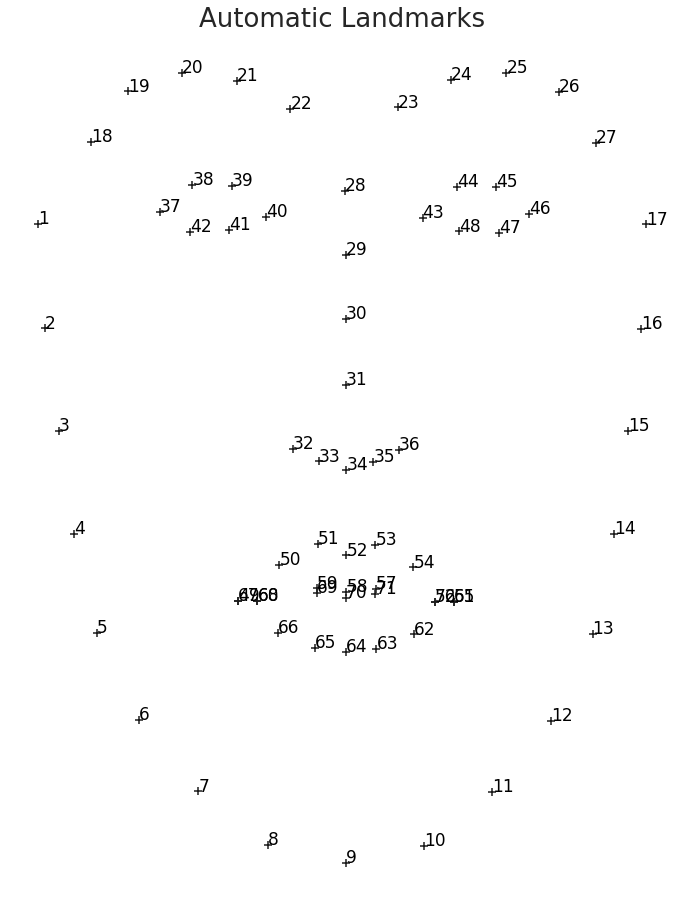

In [19]:
# PLOT FIGURE 1 - Make the average shapes!
auto_average_shape = our_data_auto_shapes.mean(0).values.reshape(-1, 2)

# Show
fig1, ax = plt.subplots(1, 1, figsize=(12, 16))
#for axis, data in ax, auto_average_shape:
    
# Plot
ax.scatter(auto_average_shape[:,0], auto_average_shape[:,1], marker='+', color='k', s=65)
    
# Enumerate
for n, pt in enumerate(auto_average_shape, start=1):
    ax.text(pt[0], pt[1], str(n), fontsize=17, color='black')

# Fix
ax.axis('off')

ax.set_title('Automatic Landmarks', fontsize=26)
ax.invert_yaxis()
fig1.savefig('Figure 1.png', dpi=300, bbox_inches='tight')

In [20]:
# Use the class to measure the faces
auto_measures_our_data = ComputeMeasures(our_data_auto_shapes, our_data_auto_predictors, fit_type='Auto').fit()
auto_measures_our_data.head()

,distinctiveness,symmetry,dimorphism,fwhr
/content/drive/My Drive/Colab Notebooks/Scientific Computing/Lectures/Automatic Faces/01-01-01-01-01-01-01,243.006044,10935.767920,-1462.068839,1.725981
/content/drive/My Drive/Colab Notebooks/Scientific Computing/Lectures/Automatic Faces/01-01-01-01-01-01-02,165.541410,10944.594830,-1191.680502,1.716924
/content/drive/My Drive/Colab Notebooks/Scientific Computing/Lectures/Automatic Faces/01-01-01-01-01-01-03,254.632947,11245.195596,-1322.631561,1.723632
/content/drive/My Drive/Colab Notebooks/Scientific Computing/Lectures/Automatic Faces/01-01-01-01-01-01-04,204.743234,10865.833976,-1386.014649,1.521363
/content/drive/My Drive/Colab Notebooks/Scientific Computing/Lectures/Automatic Faces/01-01-01-01-01-01-05,125.451601,11184.541475,-1443.839344,1.608995


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:728: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


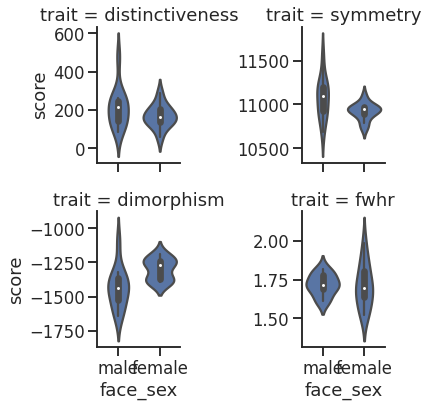

In [21]:
# Merge with original data
auto_measures_final = pd.merge(left=our_data_auto_predictors, right=auto_measures_our_data, left_index=True, right_index=True)
auto_measures_final.to_csv('corrected_auto_measures.csv')

# Visualise
sns.set_context('talk')
graph = auto_measures_final.reset_index().rename(columns={'index': 'fid'}) \
    .replace({'face_sex': {1: 'female', 0: 'male'}}) \
    .melt(id_vars=['fid', 'face_sex'], value_vars=['distinctiveness', 'symmetry', 'dimorphism', 'fwhr'], 
          var_name='trait', value_name='score')
    

sns.FacetGrid(graph, col='trait', col_wrap=2, sharey=False).map(sns.violinplot, 'face_sex', 'score')